In [26]:
#data science basics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#SKLearn stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#helpers
%matplotlib inline

In [3]:
#bring in the data
data = pd.read_csv('Demographic_Data.csv')

In [3]:
#view the data
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [4]:
data.tail()

,in-store,age,items,amount,region
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1
79999,1,30,1,527.12,3


In [6]:
#get initial counts
data.shape

(80000, 5)

In [5]:
#continue exploring
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [6]:
#notes, 8000 transactions; in-store is binary; customer max age is 85 and mean is 45
#avg transaction has 4 items, average purchase is $835
#check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [7]:
#now focusing on preprocessing
#data cleaning, transformation & checking for missing values
#data reduction
#data discretization
#text cleaning if needed
#check for duplicate rows
data = data.drop_duplicates()

In [8]:
#check for missing values by printing sum
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [9]:
#no missing values
#if there were missing values, impute or handle
#check to see if all datatypes are numeric
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

#Exploratory Data Analysis
#visualization and statistics 
#scatter plots comparing relationships between variables
#visualization of relationship between multiple variables if needed
#checking for collinearity or performing dimensionality reduction

In [11]:
#check column names
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


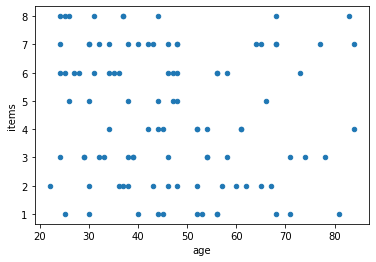

In [16]:
# Scatter using sample comparing age to items
data_sample.plot.scatter(x="age", y = "items")
print()

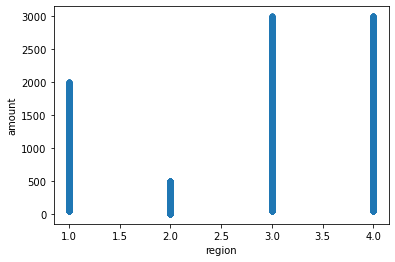

In [13]:
#scatter plot of population to compare region to amount
data.plot.scatter(x = "region", y = "amount")
print()

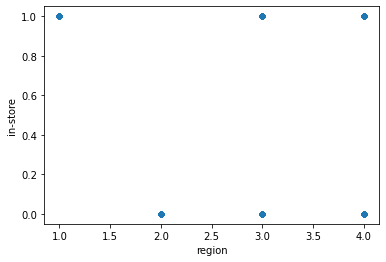

In [14]:
# Scatter plot showing transactions comparing in-store purchases by region
# No on-line purchases in Region 1, and no in-store purchases in region 2
data.plot.scatter(x="region", y="in-store")
print()

/Users/ashleybergeron/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


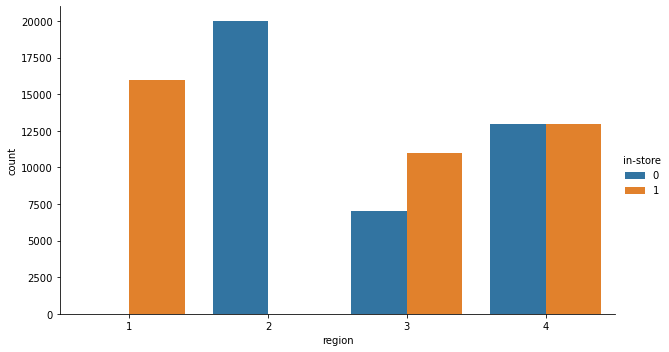

In [57]:
# Category plot counting the number of purchases in-store and on line by regions
# As shown, there are no on-line purchases in region 1, and no in-store purchased in region 2

region_compare=sns.catplot('region', data=data, hue = 'in-store', kind='count', aspect=1.75)
region_compare.set_xlabels()
print()

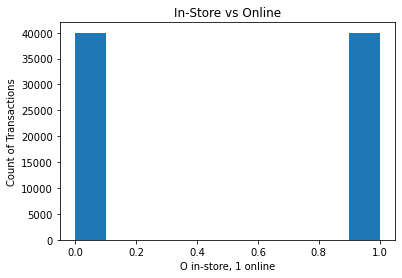

In [48]:
#simple histogram of transaction location, in-store vs online
plt.title("In-Store vs Online")
plt.xlabel("O in-store, 1 online")
plt.ylabel("Count of Transactions")
plt.hist(data['in-store'])
plt.show()
#evenly split between both in-store and online

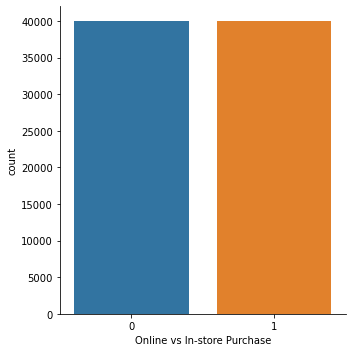

In [56]:
#same histogram using Seaborn
fg = sns.catplot(x= 'in-store', data = data, kind = 'count', aspect=1.0)
fg.set_xlabels('Online vs In-store Purchase')
print()

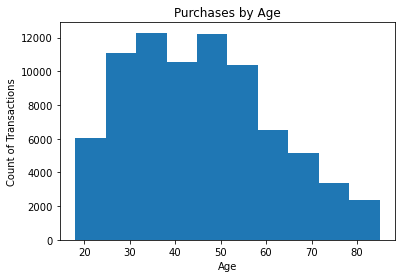

In [47]:
#check distribution of age
# Number of bins for age Width = (max age - min age) / N of bins
# Width = (85 - 18)/10 = 6.7
# Each bin is 6.7 years
plt.title("Purchases by Age")
plt.xlabel("Age")
plt.ylabel("Count of Transactions")
plt.hist(data['age'], bins = 10)
plt.show()

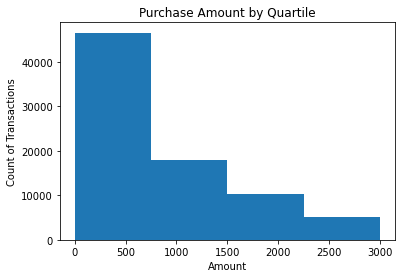

In [49]:
#check distribution of transaction amount
plt.title("Purchase Amount by Quartile")
plt.xlabel("Amount")
plt.ylabel("Count of Transactions")
plt.hist(data['amount'], bins = 4)
plt.show()

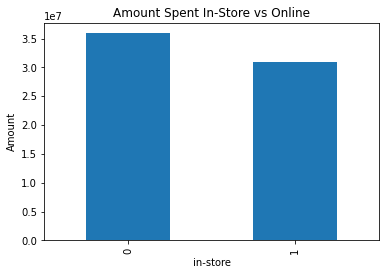

In [14]:
#Total amount spent in-store vs online
data.groupby('in-store')['amount'].sum().plot(kind='bar', title='Amount Spent In-Store vs Online', ylabel='Amount', xlabel='in-store')
print ()

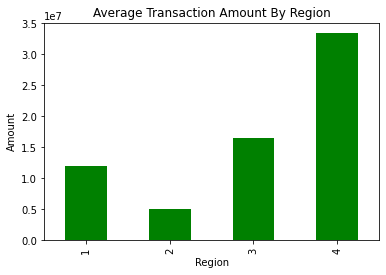

In [13]:
# total amount spent per region
data.groupby('region')['amount'].sum().plot(kind='bar', color='green', 
                                             title='Average Transaction Amount By Region', ylabel='Amount', xlabel='Region')
print ()

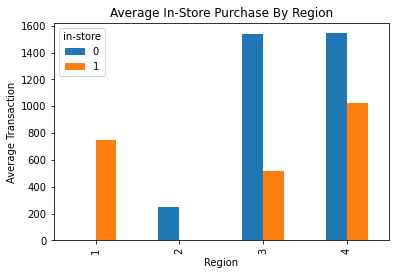

In [15]:
#use Seaborn to plot comparing average in store purchase amount by region
data_pivot = pd.pivot_table(data, columns='in-store', 
                        index='region',
                        aggfunc='mean', 
                        values='amount').plot(kind='bar', title='Average In-Store Purchase By Region', ylabel='Average Transaction', xlabel='Region')
print()

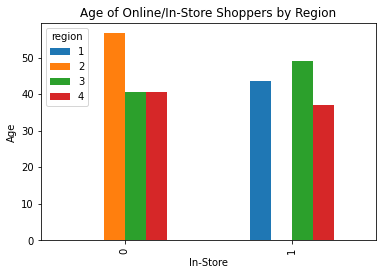

In [17]:
#Seaborn plot comparing age of on-line to in-store purchases, by region
data_pivot = pd.pivot_table(data, columns='region', 
                        index='in-store',
                        aggfunc='mean', 
                        values='age').plot(kind='bar', title='Age of Online/In-Store Shoppers by Region', xlabel='In-Store', ylabel='Age')
print()

In [23]:
#average transaction amount in store vs online
print(data.groupby('in-store')['amount'].mean())
print()

in-store
0    897.546576
1    774.106421
Name: amount, dtype: float64



In [9]:
#total transactions by region, specific number
TransCount = data.groupby(['region'])['region'].count().nlargest()
print(TransCount)

region
4    26000
2    20000
3    18000
1    16000
Name: region, dtype: int64


region
2     252.0
1     745.0
3     918.0
4    1284.0
Name: amount, dtype: float64


<AxesSubplot:title={'center':'Average Transaction Amount by Region, Smallest to Largest'}, xlabel='region', ylabel='Average Transaction Amount'>

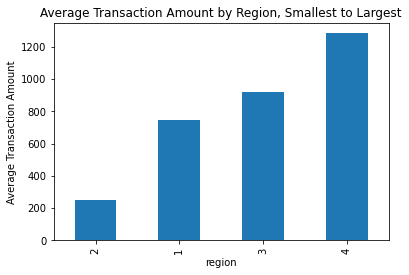

In [18]:
#average transaction amount by region

TransAvg = data.groupby(['region'])['amount'].mean().nsmallest().round()
print(TransAvg)
TransAvg.plot(kind='bar', title='Average Transaction Amount by Region, Smallest to Largest', xlabel='region', ylabel='Average Transaction Amount')

#line plots for numerical values to illustrate range and mode
#can help prevent bias and overfitting
#this data doesn't contain an example so one is created below

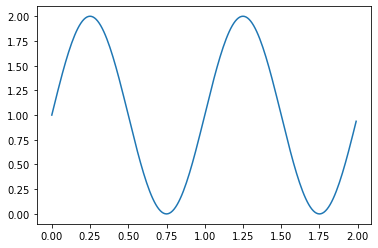

In [20]:
#example data plotted below
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)
fix, ax = plt.subplots()
ax.plot(t, s)
plt.show()

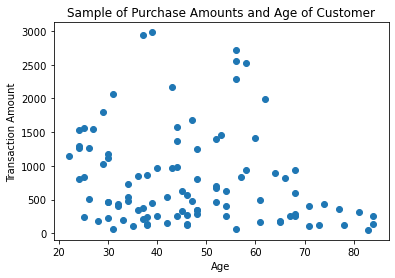

In [15]:
#to create a comparison, set two features equal to variables
#sample the data then set variables
#next, create scatter plot using matplotlib
data_sample = data.sample(100)
x = data_sample['age']
y = data_sample['amount']
plt.title("Sample of Purchase Amounts and Age of Customer")
plt.xlabel("Age")
plt.ylabel("Transaction Amount")
plt.scatter(x,y, marker='o')
plt.show()

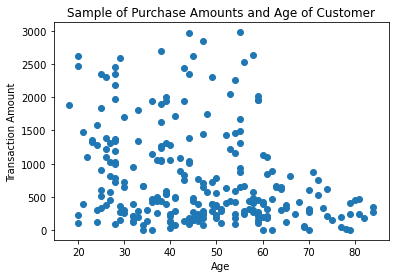

In [53]:
#try with larger sample size
data_sample = data.sample(250)
x = data_sample['age']
y = data_sample['amount']
plt.title("Sample of Purchase Amounts and Age of Customer")
plt.xlabel("Age")
plt.ylabel("Transaction Amount")
plt.scatter(x,y, marker='o')
plt.show()

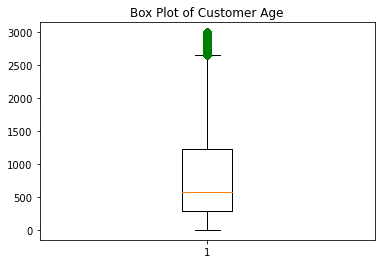

In [54]:
#box plots to visualize where bulk of data is located
#look for outliers or extreme variance
A = data['amount']
plt.title("Box Plot of Customer Age")
plt.boxplot(A,0, 'gD')
plt.show()

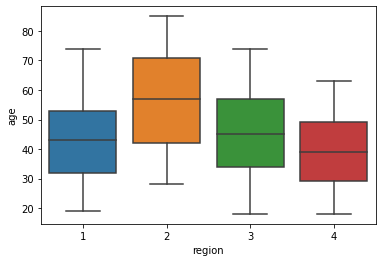

In [24]:
#Seaborn boxplot of ages by region
sns.boxplot(y='age', x='region',
           data=data)
print()

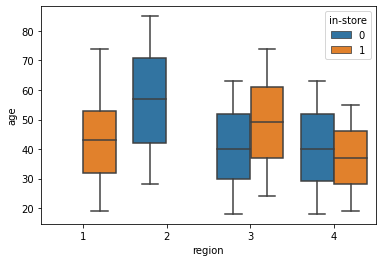

In [25]:
#boxplot of age, broken out by region, divided by in-store
sns.boxplot(y='age', x='region',
           data=data,
            hue='in-store')
print()

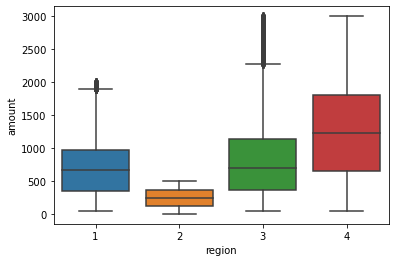

In [26]:
#Seaborn boxplot of transaction amount by region
sns.boxplot(y='amount', x='region',
           data=data)
print()

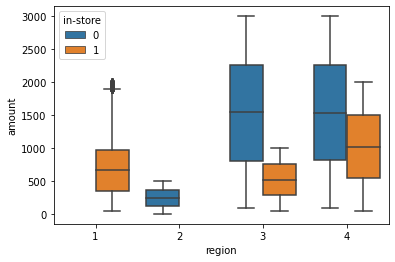

In [27]:
#boxplot of transaction amount, broken out by region, divided by in-store
sns.boxplot(y='amount', x='region',
           data=data,
            hue='in-store')
print()

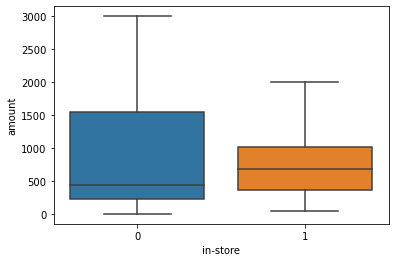

In [28]:
#Seaborn boxplot of transaction amount by in-store vs onine
sns.boxplot(y='amount', x='in-store',
           data=data)
print()

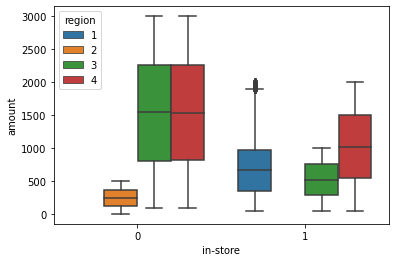

In [29]:
#boxplot of transaction amount, broken out by in-store, divided by region
sns.boxplot(y='amount', x='region',
           data=data,
            hue='in-store')
print()

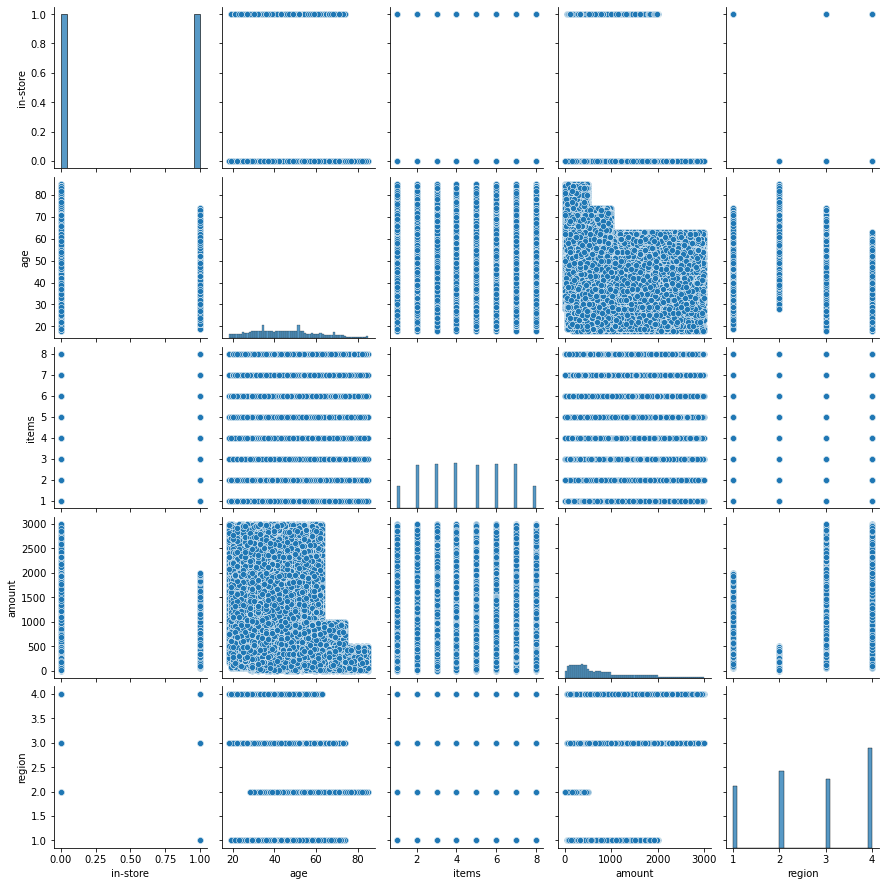

In [4]:
#Seaborn plots of all variables
sns.pairplot(data)
print()

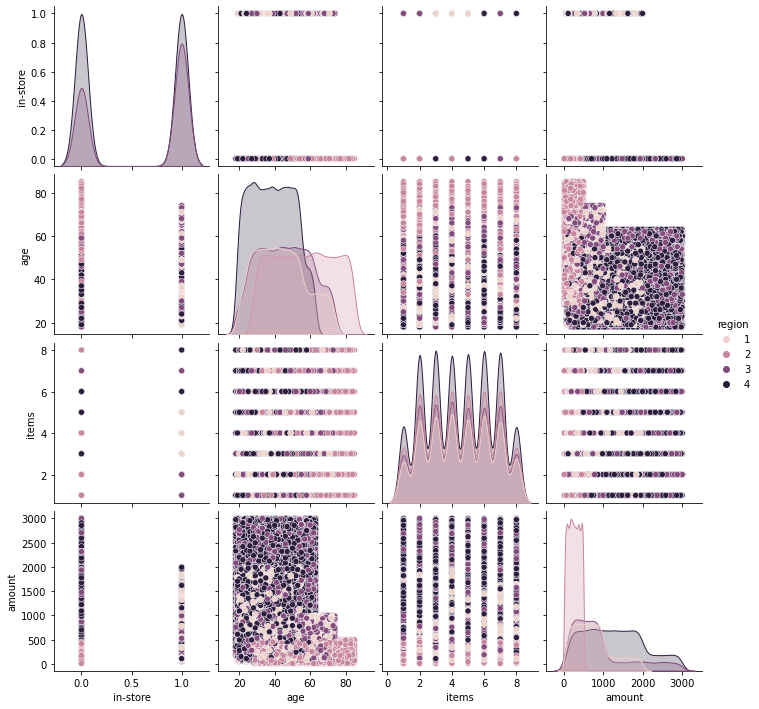

In [5]:
# Seaborn plots of all elements
sns.pairplot(data, hue='region')
print()

In [26]:
#correlation
#basic correlation coefficient matrix using pandas
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


In [28]:
#covariance and linear degree of change between 2 variables/impact
#basic covariance
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321


# notes
#use SciKitLearn to partition 4 ways
#X_train, X_test, y_train, Y_test
#training is divided into two parts and testing is divided into two parts
#select data in Python using [rows,columns]
#slicing using Pandas using data[start,stop]

In [19]:
#select features
X = data.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [33]:
#want to check relationship between region of purchase and customer age
#select dependent variable 
y = data['region']

In [21]:
#basic machine learning using train/test split method
#try Decision Tree algorithm first
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)


splitting ensures data is randomly stratified to prevent bias

In [27]:
#instantiate the algorithm then fit to training set to build the model
#modeling classification
DTC1 = DecisionTreeClassifier(max_depth=4)
DTCModel1 = DTC1.fit(X_train, y_train)

In [28]:
#use the trained model on the test set 
#predictions
DTC1preds = DTCModel1.predict(X_test)
print(classification_report(y_test, DTC1preds))

              precision    recall  f1-score   support

           1       0.41      0.55      0.47      4857
           2       0.90      1.00      0.95      5945
           3       0.55      0.24      0.34      5389
           4       0.65      0.71      0.68      7809

    accuracy                           0.64     24000
   macro avg       0.63      0.63      0.61     24000
weighted avg       0.64      0.64      0.63     24000



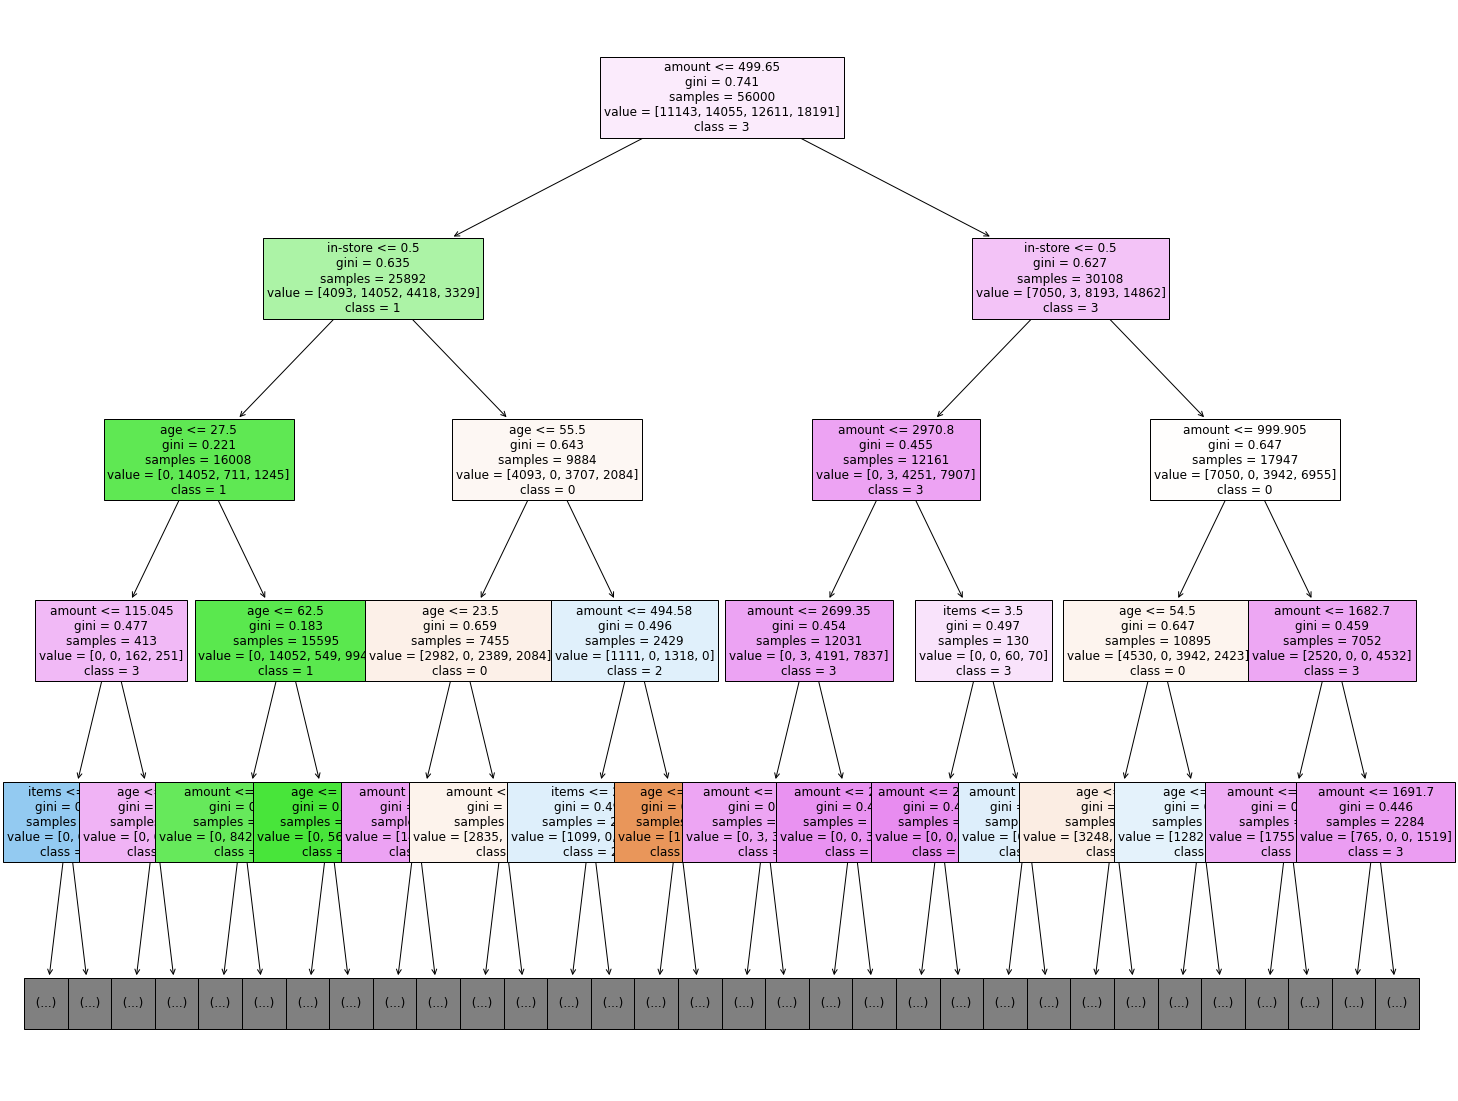

In [25]:
#visualize the decision tree
fig = plt.figure(figsize=(25,20))
tree = plot_tree(model, feature_names = X.columns, class_names=['0', '1', '2', '3'], filled = True,
                max_depth=4, fontsize=12)

In [39]:
# Modeling with RandomForestClassifier (Classification)
RFC1 = RandomForestClassifier()
RFCModel1 = RFC1.fit(X_train,y_train)
# Predictions
RFC1preds = RFCModel1.predict(X_test)
print(classification_report(y_test, RFC1preds))

              precision    recall  f1-score   support

           1       0.39      0.38      0.39      4857
           2       0.90      0.95      0.93      5945
           3       0.38      0.35      0.36      5389
           4       0.56      0.58      0.57      7809

    accuracy                           0.58     24000
   macro avg       0.56      0.57      0.56     24000
weighted avg       0.57      0.58      0.57     24000



In [35]:
#modeling with Gradient Boosting Classifier
GBC1 = GradientBoostingClassifier()
GBCModel1 = GBC1.fit(X_train, y_train)
#predictions
GBC1preds = GBCModel1.predict(X_test)
print(classification_report(y_test, GBC1preds))

              precision    recall  f1-score   support

           1       0.41      0.53      0.46      4857
           2       0.90      1.00      0.95      5945
           3       0.53      0.23      0.32      5389
           4       0.65      0.73      0.69      7809

    accuracy                           0.65     24000
   macro avg       0.62      0.62      0.61     24000
weighted avg       0.64      0.65      0.62     24000



In [36]:
#modeling with AdaBoost Classifier
ABC1 = AdaBoostClassifier()
ABCModel1 = ABC1.fit(X_train, y_train)
#predictions
ABC1preds = ABCModel1.predict(X_test)
print(classification_report(y_test, ABC1preds))

              precision    recall  f1-score   support

           1       0.42      0.36      0.39      4857
           2       0.88      1.00      0.94      5945
           3       0.00      0.00      0.00      5389
           4       0.49      0.82      0.62      7809

    accuracy                           0.59     24000
   macro avg       0.45      0.55      0.49     24000
weighted avg       0.46      0.59      0.51     24000



/Users/ashleybergeron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleybergeron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleybergeron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [40]:
#Compare five classification algorithms
#Create a copy and store in the empty list
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosing Classifier', GradientBoostingClassifier()))
algos_Class.append(('AdaBoostClassifier', AdaBoostClassifier()))
algos_Class.append(('KNeighborsClassifier', KNeighborsClassifier()))

In [41]:
#classification, comparison of cross validation scores for all 5 models above
results = []
names = [] 
for name, model in algos_Class: 
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [42]:
#classification, comparison of cross validation scores for all 5 models above with 5 folds
results = []
names = [] 
for name, model in algos_Class: 
    result = cross_val_score(model, X,y, cv=5, scoring='accuracy')
    names.append(name)
    results.append(result)
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.583725
Decision Tree Classifier 0.5641
Gradient Boosing Classifier 0.6436
AdaBoostClassifier 0.5892
KNeighborsClassifier 0.509125


now check to see if region is the best dependent variable

In [43]:
# changing the dependent variable to age
# binning using pandas cut for the age, discretize
# cut example 1
data['cut_ex1']=pd.cut(data['age'], bins=np.linspace(10, 90, 9), labels=False)
data.head()

,in-store,age,items,amount,region,cut_ex1
0,0,37,4,281.03,2,2
1,0,35,2,219.51,2,2
2,1,45,3,1525.70,4,3
3,1,46,3,715.25,3,3
4,1,33,4,1937.50,1,2


In [44]:
# checking datatype
data['cut_ex1'].describe()

count    80000.000000
mean         3.031125
std          1.611890
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: cut_ex1, dtype: float64

In [45]:
# check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
 5   cut_ex1   80000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 3.7 MB


In [46]:
# slicing, selecting features/range of columns not including age
X_2 = data.iloc[:,[0, 2, 3, 4]]
print('summary of feature sample')
X_2.head()

summary of feature sample


,in-store,items,amount,region
0,0,4,281.03,2
1,0,2,219.51,2
2,1,3,1525.70,4
3,1,3,715.25,3
4,1,4,1937.50,1


In [47]:
# dependent variable, age in buckets by decade
y_2 = data['cut_ex1']

In [48]:
# Train/Test Split for age
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size = .30, random_state = 123)

In [49]:
# Modeling with DecisionTreeClassifier with age in decades as dependent variable (Classification)
# 23ll that's not good, research says that larger test size might help
DTC2 = DecisionTreeClassifier(max_depth=3)
DTCModel2 = DTC2.fit(X_2_train,y_2_train)
# Predictions
DTC2preds = DTCModel2.predict(X_2_test)
print(classification_report(y_2_test, DTC2preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       582
           1       0.28      0.02      0.04      4028
           2       0.27      0.31      0.29      5304
           3       0.21      0.29      0.25      5382
           4       0.20      0.48      0.28      4228
           5       0.00      0.00      0.00      2568
           6       0.00      0.00      0.00      1414
           7       0.00      0.00      0.00       494

    accuracy                           0.22     24000
   macro avg       0.12      0.14      0.11     24000
weighted avg       0.19      0.22      0.17     24000



/Users/ashleybergeron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleybergeron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleybergeron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [50]:
# Modeling with RandomForestClassifier with age in decades as dependent variable (Classification)
RFC2 = RandomForestClassifier()
RFCModel2 = RFC2.fit(X_2_train,y_2_train)
# Predictions
RFC2preds = RFCModel2.predict(X_2_test)
print(classification_report(y_2_test, RFC2preds))

              precision    recall  f1-score   support

           0       0.03      0.03      0.03       582
           1       0.21      0.21      0.21      4028
           2       0.24      0.24      0.24      5304
           3       0.23      0.23      0.23      5382
           4       0.19      0.20      0.20      4228
           5       0.16      0.16      0.16      2568
           6       0.12      0.12      0.12      1414
           7       0.09      0.10      0.10       494

    accuracy                           0.20     24000
   macro avg       0.16      0.16      0.16     24000
weighted avg       0.20      0.20      0.20     24000



In [51]:
# Modeling with GradientBoostingClassifier with age in decades as dependent variable (Classification)
GBC2 = GradientBoostingClassifier()
GBCModel2 = GBC2.fit(X_2_train,y_2_train)
# Predictions
GBC2preds = GBCModel2.predict(X_2_test)
print(classification_report(y_2_test, GBC2preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       582
           1       0.25      0.24      0.24      4028
           2       0.24      0.25      0.24      5304
           3       0.23      0.35      0.28      5382
           4       0.20      0.16      0.17      4228
           5       0.17      0.14      0.15      2568
           6       0.18      0.09      0.12      1414
           7       0.09      0.00      0.01       494

    accuracy                           0.22     24000
   macro avg       0.17      0.15      0.15     24000
weighted avg       0.21      0.22      0.21     24000



In [52]:
# Modeling with KNeighborsClassifier with age in decades as dependent variable (Classification)
KNC2 = KNeighborsClassifier()
KNCModel2 = KNC2.fit(X_2_train,y_2_train)
# Predictions
KNC2preds = KNCModel2.predict(X_2_test)
print(classification_report(y_2_test, KNC2preds))

              precision    recall  f1-score   support

           0       0.04      0.03      0.03       582
           1       0.21      0.29      0.24      4028
           2       0.22      0.27      0.24      5304
           3       0.22      0.21      0.22      5382
           4       0.19      0.15      0.17      4228
           5       0.17      0.11      0.13      2568
           6       0.16      0.10      0.12      1414
           7       0.05      0.02      0.03       494

    accuracy                           0.20     24000
   macro avg       0.16      0.15      0.15     24000
weighted avg       0.20      0.20      0.20     24000



In [53]:
# Modeling with AdaBoostClassifier with age in decades as dependent variable (Classification)
ABC2 = AdaBoostClassifier()
ABCModel2 = ABC2.fit(X_2_train,y_2_train)
# Predictions
ABC2preds = ABCModel2.predict(X_2_test)
print(classification_report(y_2_test, ABC2preds))

              precision    recall  f1-score   support

           0       0.05      0.24      0.09       582
           1       0.22      0.59      0.32      4028
           2       0.00      0.00      0.00      5304
           3       0.23      0.16      0.19      5382
           4       0.23      0.03      0.06      4228
           5       0.17      0.40      0.24      2568
           6       0.00      0.00      0.00      1414
           7       0.00      0.00      0.00       494

    accuracy                           0.19     24000
   macro avg       0.11      0.18      0.11     24000
weighted avg       0.15      0.19      0.13     24000



/Users/ashleybergeron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleybergeron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleybergeron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [55]:
# Compare five classification algorithms
# Create a copy and store in the empty list
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosing Classifier', GradientBoostingClassifier()))
algos_Class.append(('AdaBoostClassifier', AdaBoostClassifier()))
algos_Class.append(('KNeighborsClassifier', KNeighborsClassifier()))

In [56]:
#classification, comparison of cross validation scores for all 5 models above
results = []
names = [] 
for name, model in algos_Class: 
    result = cross_val_score(model, X_2,y_2, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [57]:
#classification, comparison of cross validation scores for all 5 models above with 5 folds
results = []
names = [] 
for name, model in algos_Class: 
    result = cross_val_score(model, X_2,y_2, cv=5, scoring='accuracy')
    names.append(name)
    results.append(result)
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.19505
Decision Tree Classifier 0.1953125
Gradient Boosing Classifier 0.21841249999999998
AdaBoostClassifier 0.184675
KNeighborsClassifier 0.20053749999999998


These are all pretty terrible, need to check other variables

In [58]:
# trying amount as the dependent variable
# binning using pandas cut for the amount, discretize
# looked at original data description in pre processing for min, max, percentages
# cut example 2
cut_bins = [0, 300, 600, 1200, 3000]
data['cut_ex2']=pd.cut(data['amount'], bins=cut_bins, labels=False)
data.head()

,in-store,age,items,amount,region,cut_ex1,cut_ex2
0,0,37,4,281.03,2,2,0
1,0,35,2,219.51,2,2,0
2,1,45,3,1525.70,4,3,3
3,1,46,3,715.25,3,3,2
4,1,33,4,1937.50,1,2,3


In [59]:
# checking datatype
data['cut_ex2'].describe()

count    80000.000000
mean         1.483288
std          1.138074
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: cut_ex2, dtype: float64

In [60]:
# check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
 5   cut_ex1   80000 non-null  int64  
 6   cut_ex2   80000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 4.3 MB


In [61]:
# slicing, selecting features/range of columns
X_3 = data.iloc[:,[0, 1, 2, 4]]
print('summary of feature sample')
X_3.head()

summary of feature sample


,in-store,age,items,region
0,0,37,4,2
1,0,35,2,2
2,1,45,3,4
3,1,46,3,3
4,1,33,4,1


In [62]:
# dependent variable, amount in buckets by quartile
y_3 = data['cut_ex2']

In [63]:
# Train/Test Split
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size = .30, random_state = 123)

In [64]:
# Modeling with DecisionTreeClassifier with amount in buckets dependent variable (Classification)
DTC3 = DecisionTreeClassifier(max_depth=3)
DTCModel3 = DTC3.fit(X_3_train,y_3_train)
# Predictions
DTC3preds = DTCModel3.predict(X_3_test)
print(classification_report(y_3_test, DTC3preds))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58      6373
           1       0.00      0.00      0.00      5703
           2       0.40      0.57      0.47      5699
           3       0.54      0.86      0.67      6225

    accuracy                           0.51     24000
   macro avg       0.39      0.50      0.43     24000
weighted avg       0.40      0.51      0.44     24000



/Users/ashleybergeron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleybergeron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleybergeron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

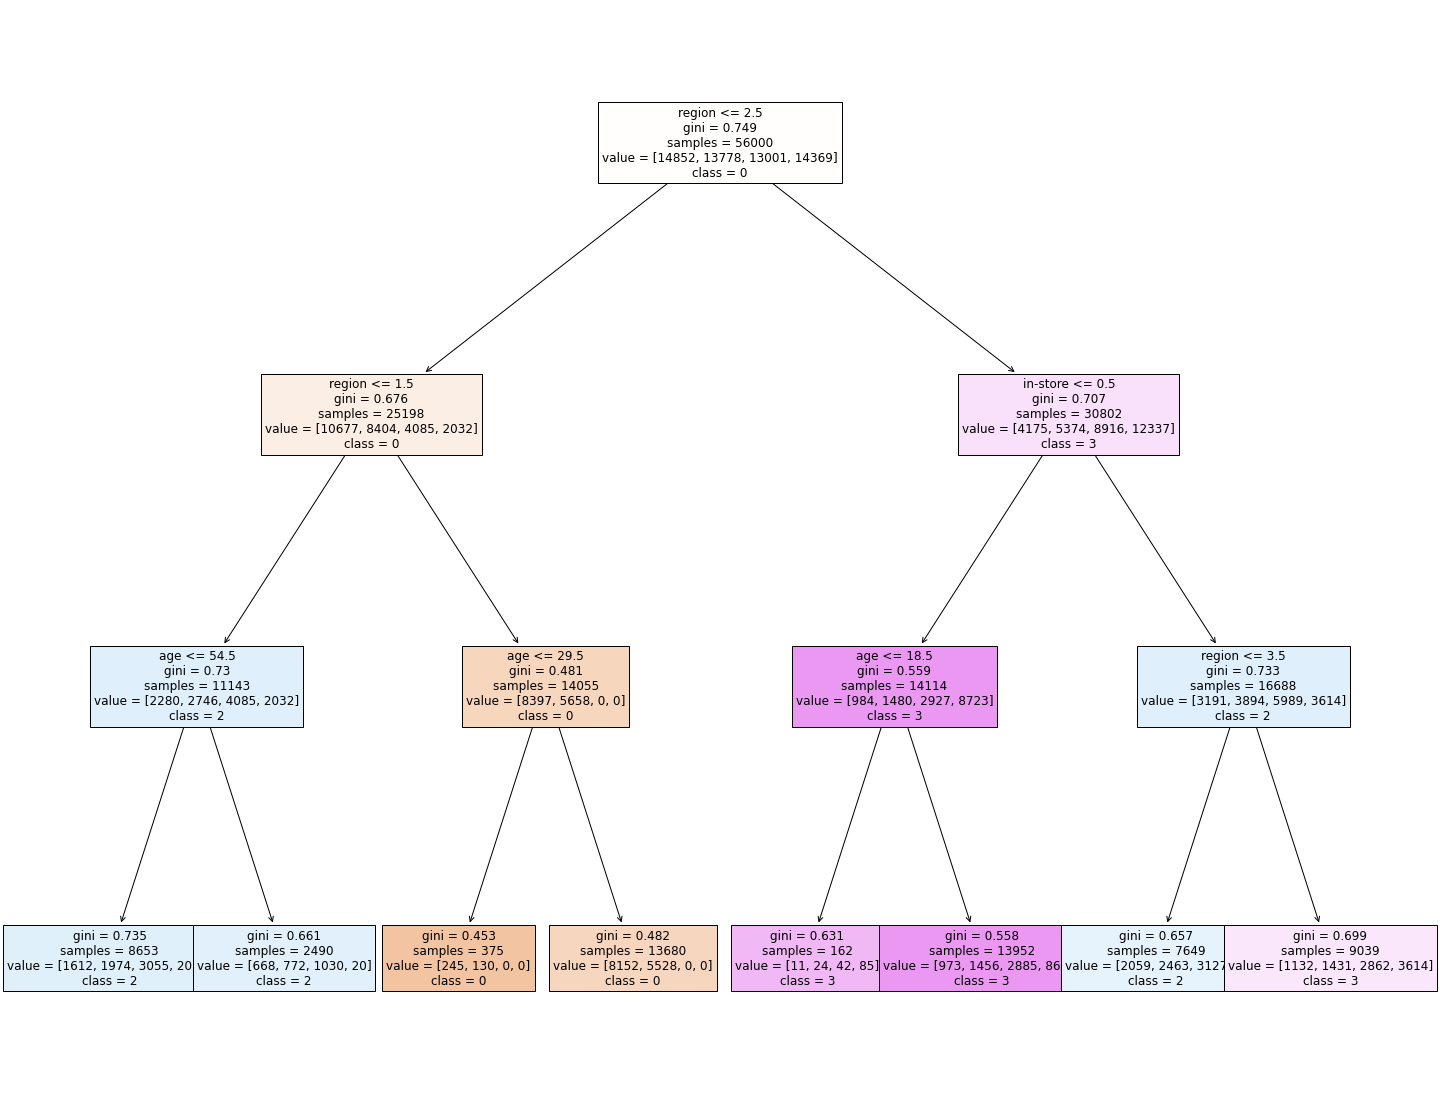

In [65]:
# Visualize decision tree
fig = plt.figure(figsize=(25, 20))
tree = plot_tree(DTCModel3, feature_names = X_3.columns, class_names = ['0', '1', '2', '3'], 
                 filled=True, fontsize=12)

In [66]:
# Modeling with RandomForestClassifier with amount in buckets as dependent variable (Classification)
RFC3 = RandomForestClassifier()
RFCModel3 = RFC3.fit(X_3_train,y_3_train)
# Predictions
RFC3preds = RFCModel3.predict(X_3_test)
print(classification_report(y_3_test, RFC3preds))

              precision    recall  f1-score   support

           0       0.55      0.51      0.53      6373
           1       0.33      0.15      0.21      5703
           2       0.37      0.42      0.40      5699
           3       0.54      0.78      0.64      6225

    accuracy                           0.48     24000
   macro avg       0.45      0.47      0.44     24000
weighted avg       0.45      0.48      0.45     24000



In [67]:
# Modeling with GradientBoostingClassifier with amount in buckets as dependent variable (Classification)
GBC3 = GradientBoostingClassifier()
GBCModel3 = GBC3.fit(X_3_train,y_3_train)
# Predictions
GBC3preds = GBCModel3.predict(X_3_test)
print(classification_report(y_3_test, GBC3preds))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58      6373
           1       0.25      0.00      0.01      5703
           2       0.40      0.55      0.46      5699
           3       0.54      0.88      0.67      6225

    accuracy                           0.51     24000
   macro avg       0.45      0.50      0.43     24000
weighted avg       0.45      0.51      0.44     24000



In [68]:
# Modeling with KNeighborsClassifier with amount in buckets as dependent variable (Classification)
KNC3 = KNeighborsClassifier()
KNCModel3 = KNC3.fit(X_3_train,y_3_train)
# Predictions
KNC3preds = KNCModel3.predict(X_3_test)
print(classification_report(y_3_test, KNC3preds))

              precision    recall  f1-score   support

           0       0.44      0.47      0.45      6373
           1       0.28      0.28      0.28      5703
           2       0.34      0.34      0.34      5699
           3       0.56      0.54      0.55      6225

    accuracy                           0.41     24000
   macro avg       0.41      0.41      0.41     24000
weighted avg       0.41      0.41      0.41     24000



In [69]:
# Modeling with AdaBoostClassifier with age in decades as dependent variable (Classification)
ABC3 = AdaBoostClassifier()
ABCModel3 = ABC3.fit(X_3_train,y_3_train)
# Predictions
ABC3preds = ABCModel3.predict(X_3_test)
print(classification_report(y_3_test, ABC3preds))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58      6373
           1       0.00      0.00      0.00      5703
           2       0.37      0.77      0.50      5699
           3       0.61      0.60      0.60      6225

    accuracy                           0.49     24000
   macro avg       0.39      0.48      0.42     24000
weighted avg       0.41      0.49      0.43     24000



/Users/ashleybergeron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleybergeron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleybergeron/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

These are better than age as dependent variable, but still worse than region.

In [70]:
# Compare five classification algorithms
# Create a copy and store in the empty list
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosing Classifier', GradientBoostingClassifier()))
algos_Class.append(('AdaBoostClassifier', AdaBoostClassifier()))
algos_Class.append(('KNeighborsClassifier', KNeighborsClassifier()))

In [71]:
#classification, comparison of cross validation scores for all 5 models above with 3 folds
results = []
names = [] 
for name, model in algos_Class: 
    result = cross_val_score(model, X_3,y_3, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [72]:
# cross validation scores
# GBC is best
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.4726499818662264
Decision Tree Classifier 0.469262488115246
Gradient Boosing Classifier 0.5021625217196973
AdaBoostClassifier 0.47999997530594135
KNeighborsClassifier 0.41326247419132195


In [73]:
# trying in store vs online as the dependent variable
# binning using pandas cut to discretize
# cut example 3
data['cut_ex3']=pd.cut(data['in-store'], bins=2, labels=False)
data.head()

,in-store,age,items,amount,region,cut_ex1,cut_ex2,cut_ex3
0,0,37,4,281.03,2,2,0,0
1,0,35,2,219.51,2,2,0,0
2,1,45,3,1525.70,4,3,3,1
3,1,46,3,715.25,3,3,2,1
4,1,33,4,1937.50,1,2,3,1


In [74]:
# checking datatype
data['cut_ex3'].describe()

count    80000.000000
mean         0.500000
std          0.500003
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: cut_ex3, dtype: float64

In [75]:
# check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
 5   cut_ex1   80000 non-null  int64  
 6   cut_ex2   80000 non-null  int64  
 7   cut_ex3   80000 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 4.9 MB


In [76]:
# slicing, selecting features/range of columns
X_4 = data.iloc[:,1:5]
print('summary of feature sample')
X_4.head()

summary of feature sample


,age,items,amount,region
0,37,4,281.03,2
1,35,2,219.51,2
2,45,3,1525.70,4
3,46,3,715.25,3
4,33,4,1937.50,1


In [77]:
# dependent variable, in store vs online
y_4 = data['cut_ex3']

In [78]:
# Train/Test Split
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4, y_4, test_size = .30, random_state = 123)

In [79]:
# Modeling with DecisionTreeClassifier with amount in buckets dependent variable (Classification)
DTC4 = DecisionTreeClassifier(max_depth=4)
DTCModel4 = DTC4.fit(X_4_train,y_4_train)
# Predictions
DTC4preds = DTCModel4.predict(X_4_test)
print(classification_report(y_4_test, DTC4preds))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     11831
           1       0.85      0.83      0.84     12169

    accuracy                           0.84     24000
   macro avg       0.84      0.84      0.84     24000
weighted avg       0.84      0.84      0.84     24000



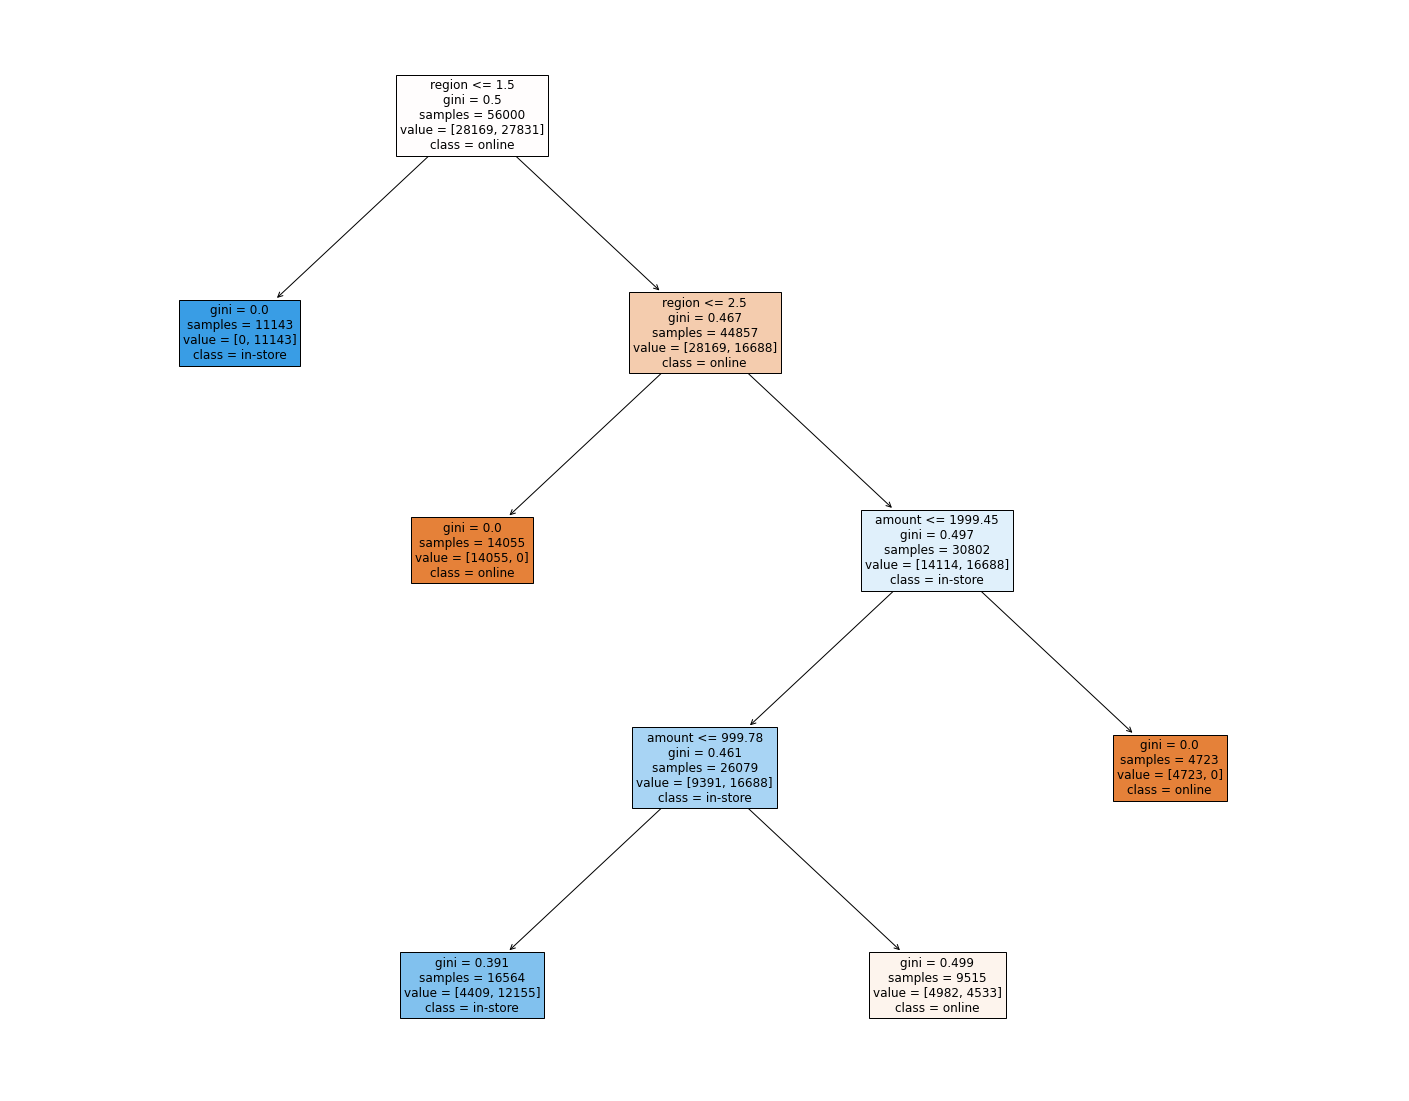

In [80]:
# Visualize decision tree
fig = plt.figure(figsize=(25, 20))
tree = plot_tree(DTCModel4, feature_names = X_4.columns, class_names = ['online', 'in-store'], 
                 filled=True, fontsize=12)

wow this one is a lot better
Region 1, North region, is all in-store purchases
Region 2, South region, is all online
Regions 3 & 4, East & West regions when purchases are less than $1000 they are in store
Regions 3 & 4, East & West regions when more than $1000 is spent it is online
Regions 3 & 4, East & West regions when between $1000-2000, online

In [81]:
# Modeling with RandomForestClassifier with amount in buckets as dependent variable (Classification)
RFC4 = RandomForestClassifier()
RFCModel4 = RFC4.fit(X_4_train,y_4_train)
# Predictions
RFC4preds = RFCModel4.predict(X_4_test)
print(classification_report(y_4_test, RFC4preds))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86     11831
           1       0.85      0.89      0.87     12169

    accuracy                           0.86     24000
   macro avg       0.86      0.86      0.86     24000
weighted avg       0.86      0.86      0.86     24000



In [82]:
# Modeling with GradientBoostingClassifier with amount in buckets as dependent variable (Classification)
GBC4 = GradientBoostingClassifier()
GBCModel4 = GBC4.fit(X_4_train,y_4_train)
# Predictions
GBC4preds = GBCModel4.predict(X_4_test)
print(classification_report(y_4_test, GBC4preds))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87     11831
           1       0.82      0.99      0.90     12169

    accuracy                           0.89     24000
   macro avg       0.91      0.89      0.89     24000
weighted avg       0.91      0.89      0.89     24000



In [83]:
# Modeling with KNeighborsClassifier with amount in buckets as dependent variable (Classification)
KNC4 = KNeighborsClassifier()
KNCModel4 = KNC4.fit(X_4_train,y_4_train)
# Predictions
KNC4preds = KNCModel4.predict(X_4_test)
print(classification_report(y_4_test, KNC4preds))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70     11831
           1       0.71      0.67      0.69     12169

    accuracy                           0.69     24000
   macro avg       0.70      0.69      0.69     24000
weighted avg       0.70      0.69      0.69     24000



In [84]:
# Modeling with AdaBoostClassifier with age in decades as dependent variable (Classification)
ABC4 = AdaBoostClassifier()
ABCModel4 = ABC4.fit(X_4_train,y_4_train)
# Predictions
ABC4preds = ABCModel4.predict(X_4_test)
print(classification_report(y_4_test, ABC4preds))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83     11831
           1       0.80      0.91      0.86     12169

    accuracy                           0.84     24000
   macro avg       0.85      0.84      0.84     24000
weighted avg       0.85      0.84      0.84     24000



In [85]:
# Compare five classification algorithms
# Create a copy and store in the empty list
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
algos_Class.append(('AdaBoostClassifier', AdaBoostClassifier()))
algos_Class.append(('KNeighborsClassifier', KNeighborsClassifier()))

In [86]:
#classification, comparison of cross validation scores for all 5 models above with 3 folds
results = []
names = [] 
for name, model in algos_Class: 
    result = cross_val_score(model, X_4,y_4, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [87]:
# print cross validation scores
# GBC is best
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.8609125135504545
Decision Tree Classifier 0.8462374916705949
Gradient Boosting Classifier 0.8872374849645737
AdaBoostClassifier 0.8432625087011284
KNeighborsClassifier 0.6957000077175026
